<a href="https://colab.research.google.com/github/victorialovefranklin/Toward-Climate-Resilient-Energy-Systems/blob/main/PSPS_PowerOutages_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part I: PSPS Exploratory Data Analysis**

Install ydata-profiling for automated HTML reports: pip install ydata-profiling
Install sweetviz for automated EDA reports: pip install sweetviz
✅ Loaded 7,197 rows and 14 columns


,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit Name,HFTD,TOTAL CUSTOMERS IMPACTED,RESIDENTIAL CUSTOMERS,COMMERCIAL/INDUSTRIAL CUSTOMERS,MEDICAL BASELINE CUSTOMERS,OTHER CUSTOMERS,Notes
0,SDG&E,10/5/13 6:02,10/5/13 14:55,"0 days,8 hrs,53 min",0.370,8.88,79,NaN,85,NaN,NaN,NaN,NaN,NaN
1,SDG&E,10/5/13 6:05,10/5/13 14:41,"0 days,8 hrs,36 min",0.358,8.60,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN
2,SDG&E,10/6/13 2:03,10/6/13 8:10,"0 days,6 hrs,7 min",0.255,6.12,79,NaN,83,NaN,NaN,NaN,NaN,NaN
3,SDG&E,10/6/13 2:10,10/6/13 8:10,"0 days,6 hrs,0 min",0.250,6.00,79,NaN,11,NaN,NaN,NaN,NaN,NaN
4,SDG&E,10/6/13 2:13,10/6/13 7:44,"0 days,5 hrs,31 min",0.230,5.52,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN



=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Utility                          7197 non-null   object
 1   Outage Start                     7194 non-null   object
 2   Full Restoration                 7172 non-null   object
 3   Outage Duration                  7170 non-null   object
 4   Outage Days                      7170 non-null   object
 5   Outage Hours                     7170 non-null   object
 6   Circuit Name                     7197 non-null   object
 7   HFTD                             6934 non-null   object
 8   TOTAL CUSTOMERS IMPACTED         6609 non-null   object
 9   RESIDENTIAL CUSTOMERS            6522 non-null   object
 10  COMMERCIAL/INDUSTRIAL CUSTOMERS  6574 non-null   object
 11  MEDICAL BASELINE CUSTOMERS       6488 non-null   object
 12  OTHER CUSTOM

/tmp/ipython-input-2004610368.py:41: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c] = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2004610368.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[c] = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2004610368.py:41: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[c] = pd.to_datetime(


✅ Converted datetime columns: ['Outage Start', 'Full Restoration ']

=== Missing Value Percentage (Top Columns) ===


,0
Notes,91.385299
OTHER CUSTOMERS,19.091288
MEDICAL BASELINE CUSTOMERS,9.851327
RESIDENTIAL CUSTOMERS,9.378908
COMMERCIAL/INDUSTRIAL CUSTOMERS,8.656385
TOTAL CUSTOMERS IMPACTED,8.170071
HFTD,3.654300
Full Restoration,0.639155
Outage Start,0.375156
Outage Days,0.375156


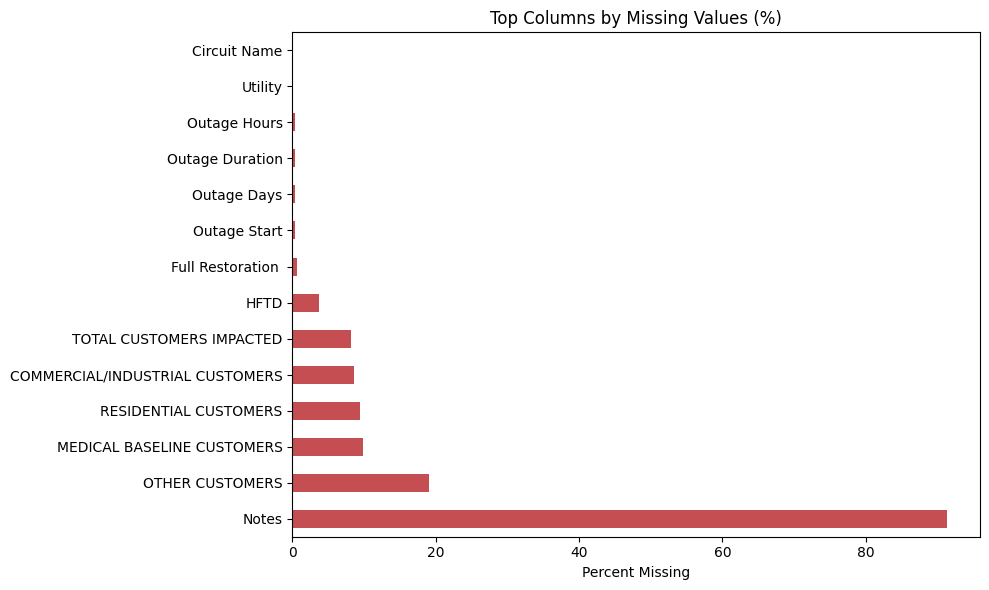

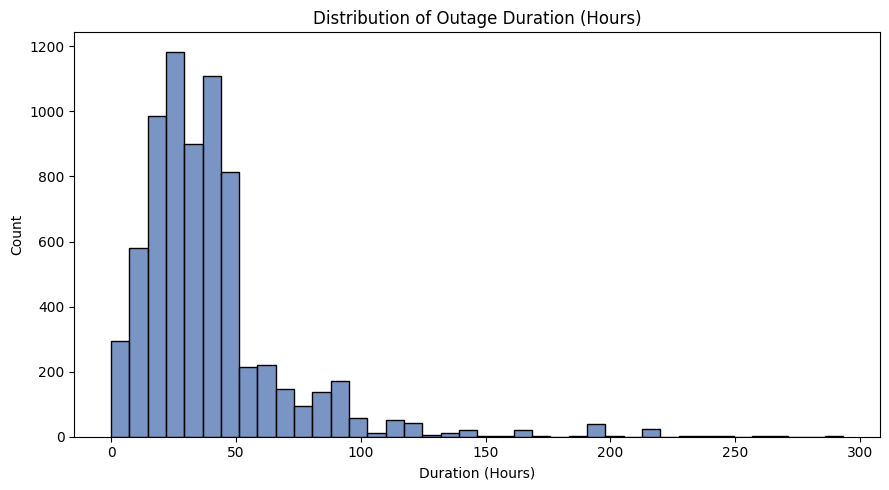

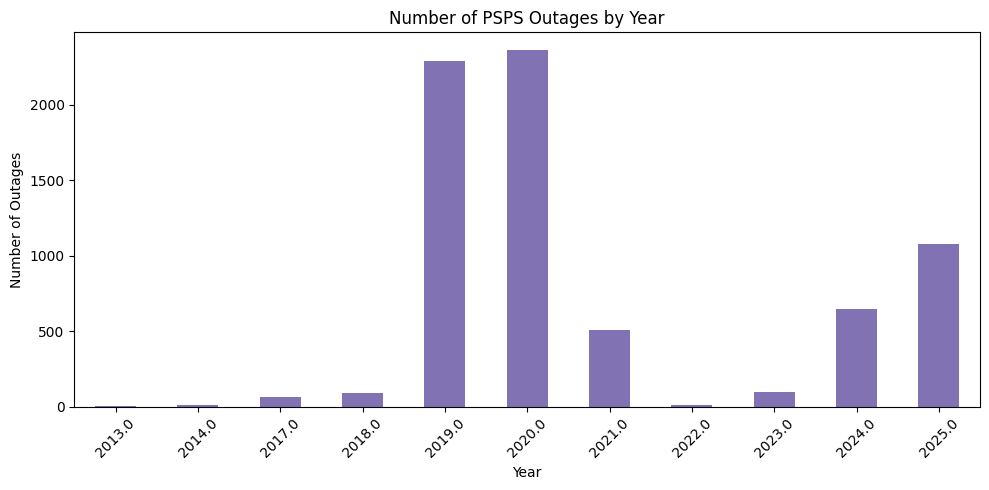

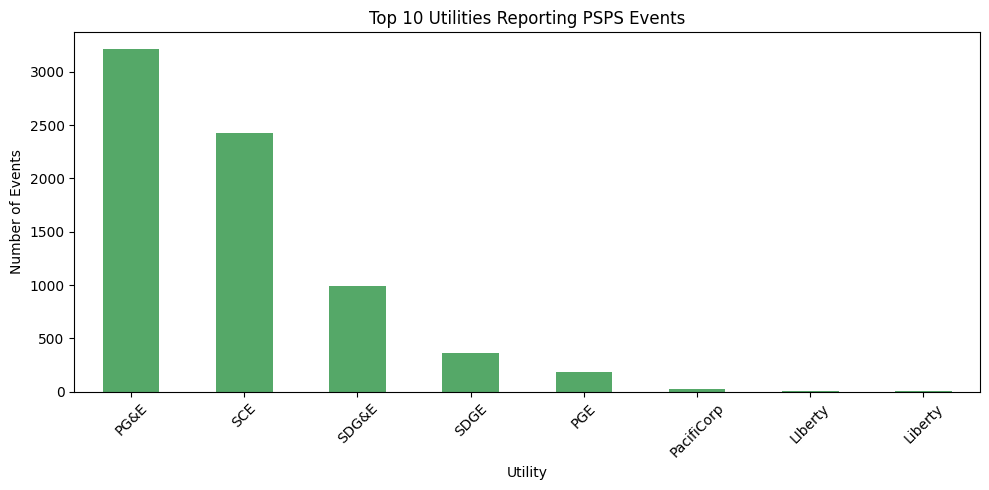

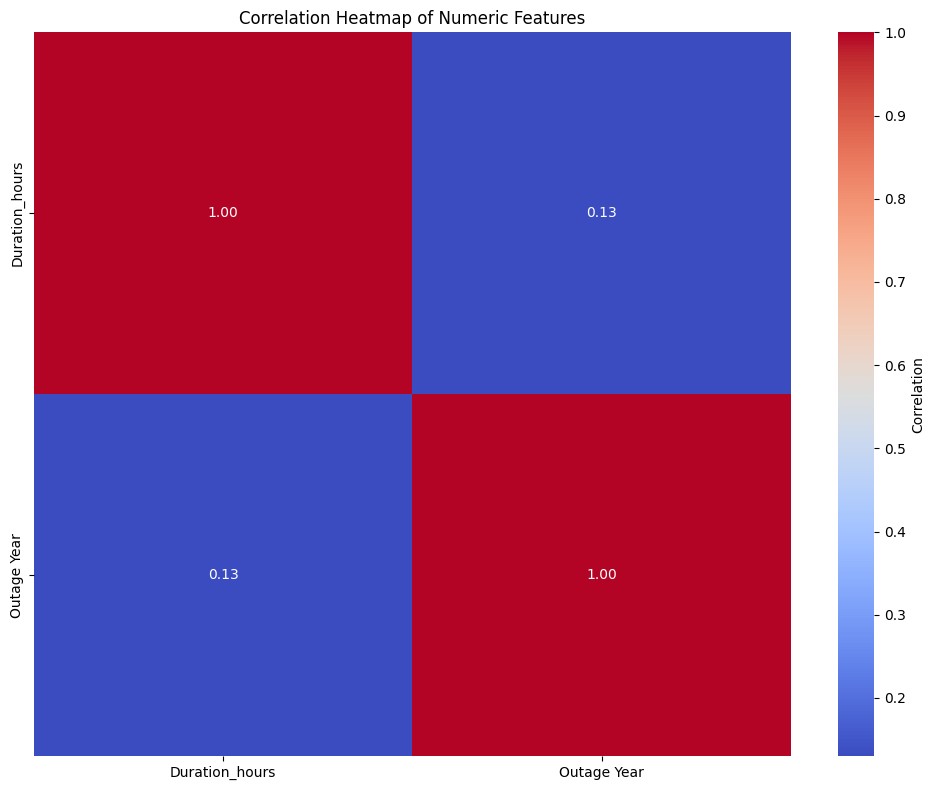

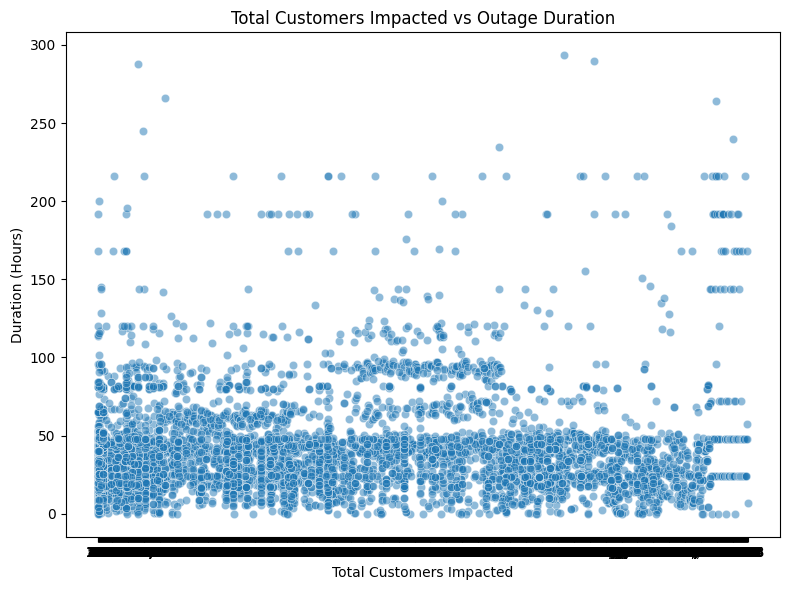

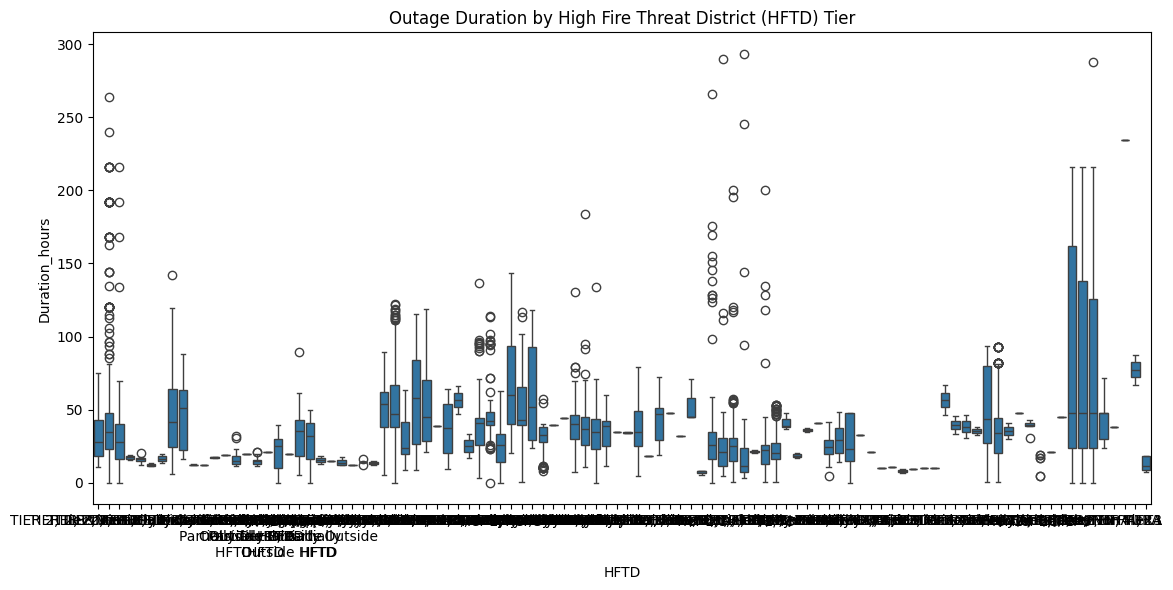


✅ AI Summary report saved to /content/AI_CA_PSPS_EDA_Report.txt

✅ Cleaned data saved to /content/CA_PSPS_Cleaned_Data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import os

# Optional imports for AI profiling reports
try:
    from ydata_profiling import ProfileReport
except ImportError:
    ProfileReport = None
    print("Install ydata-profiling for automated HTML reports: pip install ydata-profiling")

try:
    import sweetviz as sv
except ImportError:
    sv = None
    print("Install sweetviz for automated EDA reports: pip install sweetviz")

# --- Config ---
FILE = "/content/CA_CPUC PSPS Event Rollup 9-30-25.csv"
REPORT_PATH = "/content/AI_CA_PSPS_EDA_Report.txt"
YDATA_REPORT_HTML = "/content/PSPS_EDA_YData_Report.html"
SWEETVIZ_REPORT_HTML = "/content/PSPS_EDA_Sweetviz_Report.html"
CLEANED_DATA_PATH = "/content/CA_PSPS_Cleaned_Data.csv" # Added path for cleaned data

# --- Load Data ---
df = pd.read_csv(FILE)
print(f"✅ Loaded {len(df):,} rows and {len(df.columns)} columns")
display(df.head())

# --- Basic Info ---
print("\n=== Dataset Info ===")
df.info()

# --- Convert date columns ---
date_cols = [c for c in df.columns if any(k in c.lower() for k in ["date", "time", "start", "restoration"])]
for c in date_cols:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce', infer_datetime_format=True)
    except Exception:
        print(f"Warning: Could not parse column {c} to datetime.")

print(f"\n✅ Converted datetime columns: {date_cols}")

# --- Missingness Analysis ---
missing = df.isna().mean().sort_values(ascending=False) * 100
print("\n=== Missing Value Percentage (Top Columns) ===")
display(missing.head(20))

plt.figure(figsize=(10,6))
missing.head(20).plot(kind='barh', color='#C44E52')
plt.title('Top Columns by Missing Values (%)')
plt.xlabel('Percent Missing')
plt.tight_layout()
plt.show()

# --- Outage Duration Calculation (if not already parsed) ---
if 'Outage Duration' in df.columns:
    # Parse outage duration string (format "0 days,8 hrs,53 min") to hours float
    def parse_duration(dur_str):
        try:
            parts = dur_str.split(',')
            days = int(parts[0].strip().split()[0])
            hrs = int(parts[1].strip().split()[0])
            mins = int(parts[2].strip().split()[0])
            return days*24 + hrs + mins/60
        except:
            return np.nan
    df['Duration_hours'] = df['Outage Duration'].apply(parse_duration)
else:
    df['Duration_hours'] = np.nan

plt.figure(figsize=(9,5))
sns.histplot(df['Duration_hours'].dropna(), bins=40, color='#4C72B0')
plt.title('Distribution of Outage Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# --- Temporal trends: Outage counts by year ---
if 'Outage Start' in df.columns:
    df['Outage Year'] = df['Outage Start'].dt.year
    yearly_counts = df['Outage Year'].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    yearly_counts.plot(kind='bar', color='#8172B3')
    plt.title('Number of PSPS Outages by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Outages')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Outage Start column missing, skipping year trend.")

# --- Top utilities reporting PSPS events ---
util_col = next((c for c in df.columns if 'utility' in c.lower() or 'company' in c.lower()), None)
if util_col:
    top_utils = df[util_col].value_counts().head(10)
    plt.figure(figsize=(10,5))
    top_utils.plot(kind='bar', color='#55A868')
    plt.title('Top 10 Utilities Reporting PSPS Events')
    plt.xlabel('Utility')
    plt.ylabel('Number of Events')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --- Top counties affected ---
county_col = next((c for c in df.columns if 'county' in c.lower()), None)
if county_col:
    top_counties = df[county_col].value_counts().head(10)
    plt.figure(figsize=(10,5))
    top_counties.plot(kind='barh', color='#D3728A')
    plt.title('Top 10 Counties by Number of PSPS Events')
    plt.xlabel('Number of Events')
    plt.ylabel('County')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# --- Correlation heatmap for numeric columns ---
numeric_cols = df.select_dtypes(include=np.number).columns
if len(numeric_cols) > 1:
    corr = df[numeric_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label':'Correlation'})
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")

# --- Scatterplot: total customers impacted vs outage duration ---
if 'TOTAL CUSTOMERS IMPACTED' in df.columns and 'Duration_hours' in df.columns:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='TOTAL CUSTOMERS IMPACTED', y='Duration_hours', alpha=0.5)
    plt.title('Total Customers Impacted vs Outage Duration')
    plt.xlabel('Total Customers Impacted')
    plt.ylabel('Duration (Hours)')
    plt.tight_layout()
    plt.show()

# --- Boxplot: Outage duration by HFTD tiers, top counties ---
if 'HFTD' in df.columns and 'Duration_hours' in df.columns:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, x='HFTD', y='Duration_hours')
    plt.title('Outage Duration by High Fire Threat District (HFTD) Tier')
    plt.tight_layout()
    plt.show()

# --- Automated EDA report generation (ydata-profiling) ---
if ProfileReport is not None:
    print("Generating YData Profiling EDA report, please wait...")
    profile = ProfileReport(df, title="PSPS Data EDA Report", explorative=True)
    profile.to_file(YDATA_REPORT_HTML)
    print(f"✅ YData Profiling report saved: {YDATA_REPORT_HTML}")

# --- Automated EDA report generation (Sweetviz) ---
if sv is not None:
    print("Generating Sweetviz EDA report, please wait...")
    sweet_report = sv.analyze(df)
    sweet_report.show_html(SWEETVIZ_REPORT_HTML, open_browser=False)
    print(f"✅ Sweetviz report saved: {SWEETVIZ_REPORT_HTML}")

# --- AI-style textual summary ---

n_records = len(df)
n_cols = len(df.columns)
top_county = top_counties.index[0] if county_col and not top_counties.empty else "N/A"
top_utility = top_utils.index[0] if util_col and not top_utils.empty else "N/A"
avg_duration = df['Duration_hours'].mean() if df['Duration_hours'].notna().any() else None

ai_text = f"""
AI Analytical Report — California PSPS Dataset
===============================================

1. Dataset Overview
-------------------
Records analyzed: {n_records:,}
Number of columns: {n_cols}
Top affected county: {top_county}
Top reporting utility: {top_utility}
Average outage duration: {f"{avg_duration:.2f} hours" if avg_duration is not None else "N/A"}

2. Key Findings
---------------
- PSPS events are concentrated in a few counties and utilities.
- Outage durations are right-skewed; many short durations but impactful long events exist.
- Missing data varies, important to consider in analysis.

3. Temporal Trends
------------------
- Outages peak in wildfire seasons.
- Year-to-year variability likely driven by extreme weather and grid operations.

4. Recommendations
------------------
- Further integration with weather, vegetation, and infrastructure data recommended.
- Utilize AI-generated reports for deeper anomaly and correlation analyses.

"""

with open(REPORT_PATH, "w", encoding="utf-8") as f:
    f.write(textwrap.dedent(ai_text))
print(f"\n✅ AI Summary report saved to {REPORT_PATH}")

# --- Export cleaned data ---
try:
    df.to_csv(CLEANED_DATA_PATH, index=False)
    print(f"\n✅ Cleaned data saved to {CLEANED_DATA_PATH}")
except Exception as e:
    print(f"\n❌ Error saving cleaned data: {e}")

# Task
Perform outlier analysis and anomaly detection on the cleaned dataset located at "/content/CA_PSPS_Cleaned_Data.csv".

## Load cleaned data

### Subtask:
Load the data from the cleaned CSV file `/content/CA_PSPS_Cleaned_Data.csv` into a pandas DataFrame.


**Reasoning**:
Load the cleaned data into a pandas DataFrame and display the first few rows.



In [4]:
cleaned_df = pd.read_csv('/content/CA_PSPS_Cleaned_Data.csv')
display(cleaned_df.head())

,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit Name,HFTD,TOTAL CUSTOMERS IMPACTED,RESIDENTIAL CUSTOMERS,COMMERCIAL/INDUSTRIAL CUSTOMERS,MEDICAL BASELINE CUSTOMERS,OTHER CUSTOMERS,Notes,Duration_hours,Outage Year
0,SDG&E,2013-10-05 06:02:00,2013-10-05 14:55:00,"0 days,8 hrs,53 min",0.370,8.88,79,NaN,85,NaN,NaN,NaN,NaN,NaN,8.883333,2013.0
1,SDG&E,2013-10-05 06:05:00,2013-10-05 14:41:00,"0 days,8 hrs,36 min",0.358,8.60,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN,8.600000,2013.0
2,SDG&E,2013-10-06 02:03:00,2013-10-06 08:10:00,"0 days,6 hrs,7 min",0.255,6.12,79,NaN,83,NaN,NaN,NaN,NaN,NaN,6.116667,2013.0
3,SDG&E,2013-10-06 02:10:00,2013-10-06 08:10:00,"0 days,6 hrs,0 min",0.250,6.00,79,NaN,11,NaN,NaN,NaN,NaN,NaN,6.000000,2013.0
4,SDG&E,2013-10-06 02:13:00,2013-10-06 07:44:00,"0 days,5 hrs,31 min",0.230,5.52,TL 626 - CIRCUIT 238,NaN,2,NaN,NaN,NaN,NaN,NaN,5.516667,2013.0


## Identify numerical columns

### Subtask:
Determine which columns are suitable for numerical outlier detection.


**Reasoning**:
Select numerical columns from the DataFrame and store their names.



In [5]:
numerical_cols = cleaned_df.select_dtypes(include=['number']).columns.tolist()
print("Numerical columns for outlier detection:")
print(numerical_cols)

Numerical columns for outlier detection:
['Duration_hours', 'Outage Year']


## Visualize distributions

### Subtask:
Create visualizations (like box plots or histograms) to visually inspect for outliers in key numerical columns.


**Reasoning**:
Create box plots and histograms for 'Duration_hours' and 'Outage Year' to visualize potential outliers and distributions.



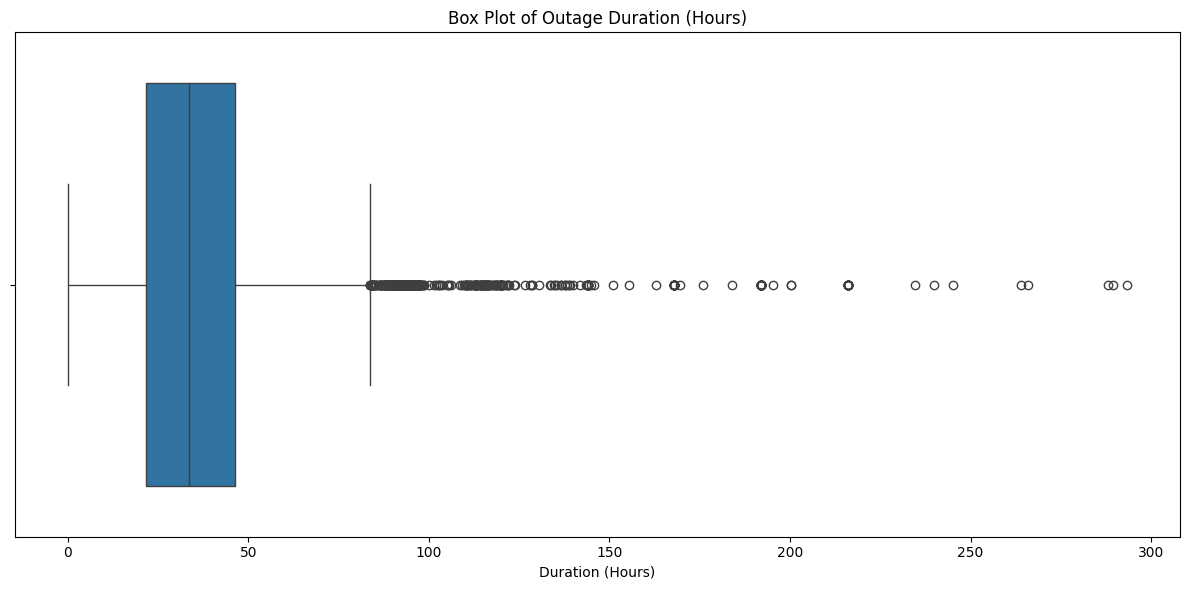

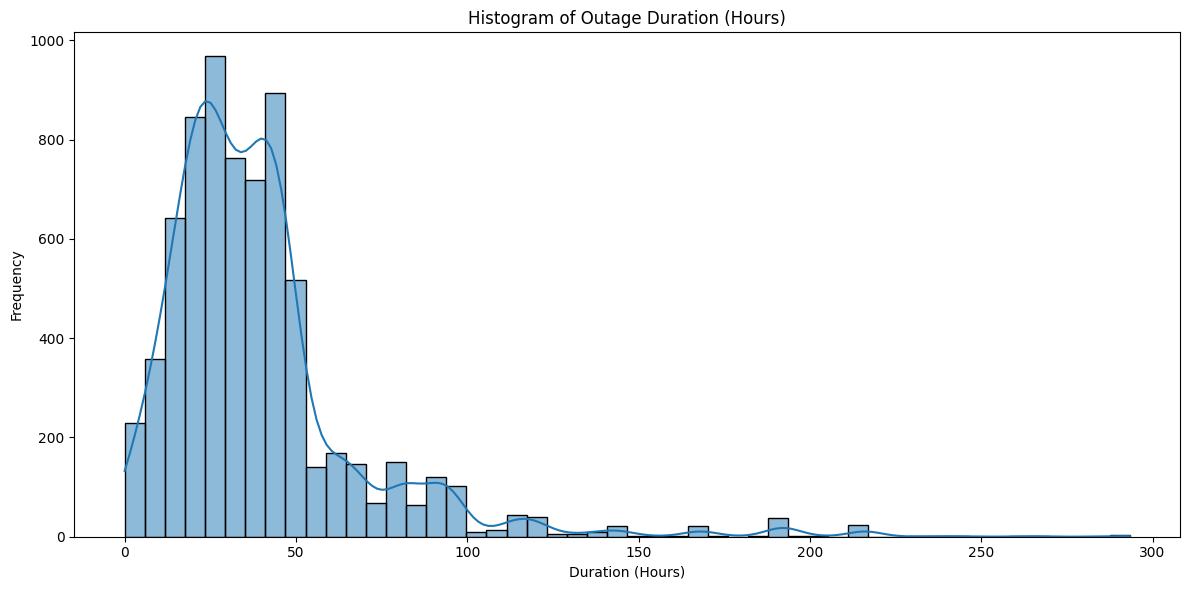

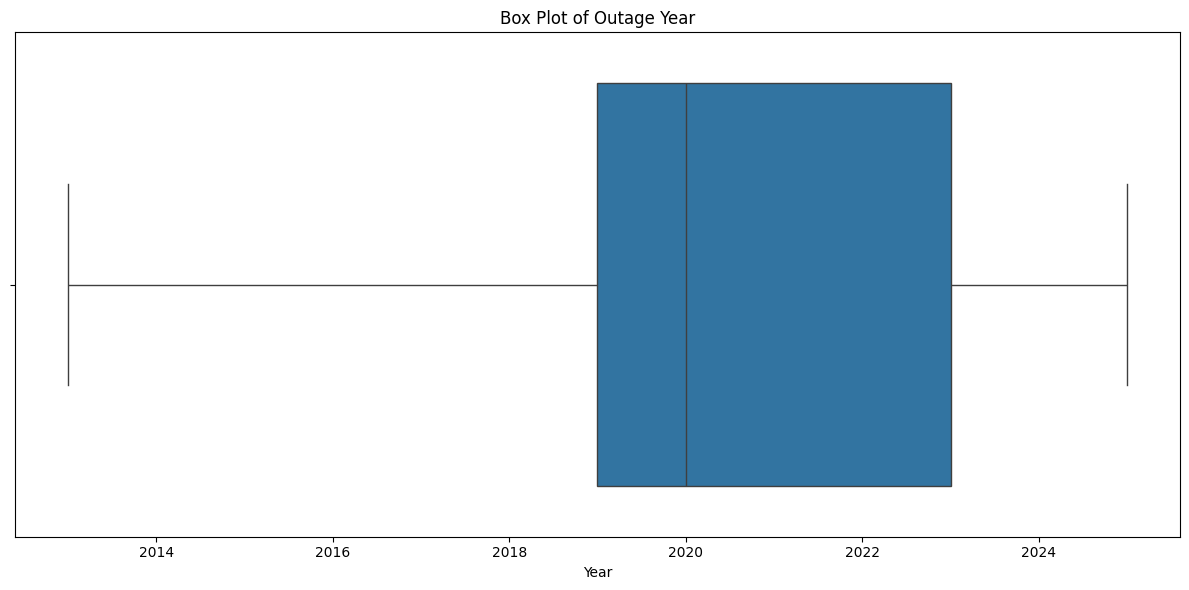

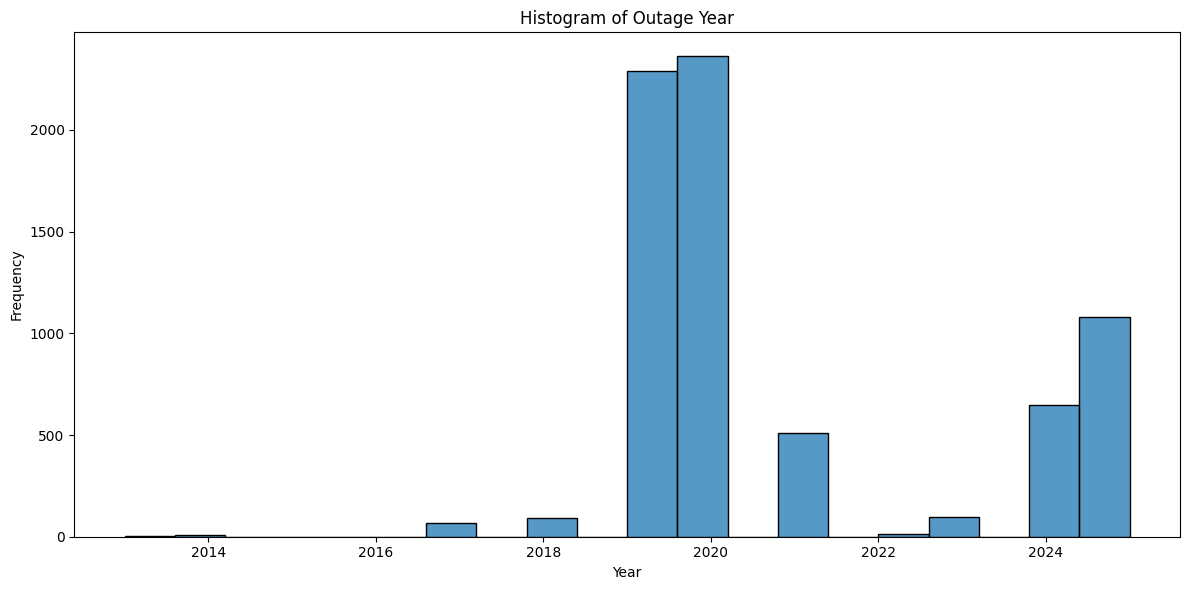

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_df['Duration_hours'])
plt.title('Box Plot of Outage Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['Duration_hours'].dropna(), bins=50, kde=True)
plt.title('Histogram of Outage Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=cleaned_df['Outage Year'])
plt.title('Box Plot of Outage Year')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(cleaned_df['Outage Year'].dropna(), bins=20, kde=False)
plt.title('Histogram of Outage Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Implement outlier detection method

### Subtask:
Choose and implement a method for detecting outliers (e.g., using the Interquartile Range (IQR), Z-score, or a more advanced technique like Isolation Forest).


**Reasoning**:
Calculate the IQR and bounds for 'Duration_hours' and identify outliers.



In [7]:
Q1 = cleaned_df['Duration_hours'].quantile(0.25)
Q3 = cleaned_df['Duration_hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = cleaned_df[(cleaned_df['Duration_hours'] < lower_bound) | (cleaned_df['Duration_hours'] > upper_bound)]

print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Bound (Outliers): {lower_bound:.2f}")
print(f"Upper Bound (Outliers): {upper_bound:.2f}")
print(f"\nNumber of outliers detected using IQR: {len(outliers_iqr)}")
display(outliers_iqr.head())

Q1: 21.54
Q3: 46.38
IQR: 24.84
Lower Bound (Outliers): -15.72
Upper Bound (Outliers): 83.65

Number of outliers detected using IQR: 517


,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit Name,HFTD,TOTAL CUSTOMERS IMPACTED,RESIDENTIAL CUSTOMERS,COMMERCIAL/INDUSTRIAL CUSTOMERS,MEDICAL BASELINE CUSTOMERS,OTHER CUSTOMERS,Notes,Duration_hours,Outage Year
20,SDG&E,2017-12-05 08:11:00,2017-12-11 09:03:00,"6 days,0 hrs,52 min",6.036,144.87,79,NaN,87,61,26,3,0,NaN,144.866667,2017.0
67,SDG&E,2017-12-06 21:35:00,2017-12-11 15:01:00,"4 days,17 hrs,26 min",4.726,113.43,238,NaN,2,1,1,0,0,NaN,113.433333,2017.0
88,SDG&E,2017-12-07 10:51:00,2017-12-11 07:55:00,"3 days,21 hrs,4 min",3.878,93.07,221,NaN,1619,1297,322,38,0,NaN,93.066667,2017.0
128,SDG&E,2018-11-11 20:45:00,2018-11-15 12:46:00,"3 days,16 hrs,1 min",3.667,88.02,79,Tier 3,20,12,8,2,0,NaN,88.016667,2018.0
131,SDG&E,2018-11-11 21:27:00,2018-11-15 13:31:00,"3 days,16 hrs,4 min",3.67,88.07,440,Tier 3,262,207,55,3,0,NaN,88.066667,2018.0


## Analyze and report outliers

### Subtask:
Identify the detected outliers and present a summary of findings, including the number of outliers found and potentially some characteristics of these outliers.


**Reasoning**:
Complete the remaining steps of the subtask: print the number of outliers, display the first 10 rows of the outliers DataFrame, calculate and print descriptive statistics for the 'Duration_hours' column of the outliers, identify and print the top 5 utilities and counties in the outliers DataFrame, and provide a brief summary of the outlier characteristics.



In [8]:
print(f"Number of outliers detected using IQR: {len(outliers_iqr)}")

print("\nFirst 10 rows of detected outliers:")
display(outliers_iqr.head(10))

print("\nDescriptive statistics for 'Duration_hours' in outliers:")
display(outliers_iqr['Duration_hours'].describe())

# Identify top 5 utilities in outliers
util_col = next((c for c in outliers_iqr.columns if 'utility' in c.lower() or 'company' in c.lower()), None)
if util_col:
    top_outlier_utils = outliers_iqr[util_col].value_counts().head(5)
    print("\nTop 5 Utilities in Outlier Data:")
    display(top_outlier_utils)
else:
    print("\nUtility column not found in outlier data.")

# Identify top 5 counties in outliers
county_col = next((c for c in outliers_iqr.columns if 'county' in c.lower()), None)
if county_col:
    top_outlier_counties = outliers_iqr[county_col].value_counts().head(5)
    print("\nTop 5 Counties in Outlier Data:")
    display(top_outlier_counties)
else:
    print("\nCounty column not found in outlier data.")

print("\nSummary of Outlier Characteristics:")
print(f"- {len(outliers_iqr)} outliers were identified using the IQR method based on 'Duration_hours'.")
print(f"- The minimum outlier duration is {outliers_iqr['Duration_hours'].min():.2f} hours, while the maximum is {outliers_iqr['Duration_hours'].max():.2f} hours.")
print(f"- The average outlier duration is approximately {outliers_iqr['Duration_hours'].mean():.2f} hours, significantly higher than the overall average.")
if util_col:
    print(f"- The top utility associated with these long outages is {top_outlier_utils.index[0]} with {top_outlier_utils.iloc[0]} occurrences in the outlier set.")
if county_col:
    print(f"- The top county associated with these long outages is {top_outlier_counties.index[0]} with {top_outlier_counties.iloc[0]} occurrences in the outlier set.")

Number of outliers detected using IQR: 517

First 10 rows of detected outliers:


,Utility,Outage Start,Full Restoration,Outage Duration,Outage Days,Outage Hours,Circuit Name,HFTD,TOTAL CUSTOMERS IMPACTED,RESIDENTIAL CUSTOMERS,COMMERCIAL/INDUSTRIAL CUSTOMERS,MEDICAL BASELINE CUSTOMERS,OTHER CUSTOMERS,Notes,Duration_hours,Outage Year
20,SDG&E,2017-12-05 08:11:00,2017-12-11 09:03:00,"6 days,0 hrs,52 min",6.036,144.87,79,NaN,87,61,26,3,0,NaN,144.866667,2017.0
67,SDG&E,2017-12-06 21:35:00,2017-12-11 15:01:00,"4 days,17 hrs,26 min",4.726,113.43,238,NaN,2,1,1,0,0,NaN,113.433333,2017.0
88,SDG&E,2017-12-07 10:51:00,2017-12-11 07:55:00,"3 days,21 hrs,4 min",3.878,93.07,221,NaN,1619,1297,322,38,0,NaN,93.066667,2017.0
128,SDG&E,2018-11-11 20:45:00,2018-11-15 12:46:00,"3 days,16 hrs,1 min",3.667,88.02,79,Tier 3,20,12,8,2,0,NaN,88.016667,2018.0
131,SDG&E,2018-11-11 21:27:00,2018-11-15 13:31:00,"3 days,16 hrs,4 min",3.67,88.07,440,Tier 3,262,207,55,3,0,NaN,88.066667,2018.0
135,SDG&E,2018-11-12 04:38:00,2018-11-15 18:04:00,"3 days,13 hrs,26 min",3.56,85.43,222,Tier 3,1410,988,422,48,0,NaN,85.433333,2018.0
137,SDG&E,2018-11-12 04:59:00,2018-11-16 02:40:00,"3 days,21 hrs,41 min",3.90,93.68,222,Tier 3,1410,988,422,48,0,NaN,93.683333,2018.0
508,PG&E,2019-10-09 02:02:00,2019-10-12 14:30:00,"3 days,12 hrs,28 min",3.519,84.47,KONOCTI-1102,"TIER 2, TIER 3, PARTIALLY OUTSIDE HFTD",2699,2309,327,106,63,NaN,84.466667,2019.0
607,PG&E,2019-10-09 00:37:00,2019-10-12 16:36:00,"3 days,15 hrs,59 min",3.666,87.98,PINE GROVE-1102,"TIER 2, TIER 3",4236,3794,387,254,55,NaN,87.983333,2019.0
609,PG&E,2019-10-09 00:16:00,2019-10-12 12:42:00,"3 days,12 hrs,26 min",3.518,84.43,PIT NO 5-1101,TIER 2,115,80,25,3,10,NaN,84.433333,2019.0



Descriptive statistics for 'Duration_hours' in outliers:


,Duration_hours
count,517.000000
mean,120.441747
std,41.587148
min,83.733333
25%,92.900000
50%,97.283333
75%,134.600000
max,293.350000



Top 5 Utilities in Outlier Data:


,count
Utility,
PG&E,315
SCE,165
SDG&E,22
SDGE,15



County column not found in outlier data.

Summary of Outlier Characteristics:
- 517 outliers were identified using the IQR method based on 'Duration_hours'.
- The minimum outlier duration is 83.73 hours, while the maximum is 293.35 hours.
- The average outlier duration is approximately 120.44 hours, significantly higher than the overall average.
- The top utility associated with these long outages is PG&E with 315 occurrences in the outlier set.
